# 黃金期貨 資料下載＆K線分析

## Part 1: 用Yahoo財經套件 下載即時/歷史資料
沒有yfinance套件可以用以下指令安裝
- pip install yfinance

In [61]:
import yfinance as yf
gold = yf.download(tickers = "GC=F", period = "1d", interval = "5m")
gold

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-04-01 00:00:00-04:00,1943.000000,1944.500000,1942.900024,1943.900024,1943.900024,108
2022-04-01 00:05:00-04:00,1943.800049,1944.199951,1943.400024,1943.699951,1943.699951,113
2022-04-01 00:10:00-04:00,1943.800049,1944.199951,1943.800049,1944.099976,1944.099976,97
2022-04-01 00:15:00-04:00,1944.099976,1944.400024,1943.500000,1943.599976,1943.599976,129
2022-04-01 00:20:00-04:00,1943.500000,1943.599976,1942.599976,1942.599976,1942.599976,127
...,...,...,...,...,...,...
2022-04-01 16:35:00-04:00,1927.400024,1927.400024,1926.900024,1927.300049,1927.300049,74
2022-04-01 16:40:00-04:00,1927.300049,1927.500000,1926.699951,1927.300049,1927.300049,84
2022-04-01 16:45:00-04:00,1927.199951,1927.300049,1925.400024,1926.400024,1926.400024,156


## Part 2: 分析Ｋ線反轉型態 - 鎚子
沒有TA-Lib套件可以用以下指令安裝
- pip install TA-Lib

### 2.1: 計算K線型態: 鎚子(CDLHAMMER)型態

In [62]:
import talib
gold['CDLHAMMER'] = getattr(talib, 'CDLHAMMER')(gold['Open'], gold['High'], gold['Low'], gold['Close'])
gold.head()

,Open,High,Low,Close,Adj Close,Volume,CDLHAMMER
Datetime,,,,,,,
2022-04-01 00:00:00-04:00,1943.000000,1944.500000,1942.900024,1943.900024,1943.900024,108,0
2022-04-01 00:05:00-04:00,1943.800049,1944.199951,1943.400024,1943.699951,1943.699951,113,0
2022-04-01 00:10:00-04:00,1943.800049,1944.199951,1943.800049,1944.099976,1944.099976,97,0
2022-04-01 00:15:00-04:00,1944.099976,1944.400024,1943.500000,1943.599976,1943.599976,129,0
2022-04-01 00:20:00-04:00,1943.500000,1943.599976,1942.599976,1942.599976,1942.599976,127,0


### 2.2: 找出K線型態: 鎚子(CDLHAMMER)型態
- 'CDLHAMMER' 函式回傳值 **100**: 偏上漲型態

In [63]:
gold[gold['CDLHAMMER'] != 0]

,Open,High,Low,Close,Adj Close,Volume,CDLHAMMER
Datetime,,,,,,,
2022-04-01 01:05:00-04:00,1941.400024,1941.599976,1940.699951,1941.599976,1941.599976,166,100
2022-04-01 03:30:00-04:00,1935.400024,1935.500000,1935.199951,1935.300049,1935.300049,20,100
2022-04-01 04:20:00-04:00,1935.199951,1935.400024,1933.699951,1934.599976,1934.599976,298,100
2022-04-01 08:00:00-04:00,1932.400024,1933.599976,1927.800049,1933.400024,1933.400024,382,100
2022-04-01 11:30:00-04:00,1931.500000,1931.800049,1929.699951,1931.000000,1931.000000,828,100
2022-04-01 14:10:00-04:00,1925.699951,1926.199951,1921.400024,1926.000000,1926.000000,116,100
2022-04-01 15:10:00-04:00,1925.500000,1926.199951,1924.500000,1926.199951,1926.199951,359,100
2022-04-01 16:30:00-04:00,1927.599976,1927.599976,1926.900024,1927.300049,1927.300049,77,100


## Part 3: 畫出黃金期貨K線圖
沒有plotly套件可以用以下指令安裝
- pip install plotly
- jupyter labextension install jupyterlab-plotly

In [66]:
idx = gold[gold['CDLHAMMER'] != 0].index
idx

DatetimeIndex(['2022-04-01 01:05:00-04:00', '2022-04-01 03:30:00-04:00',
               '2022-04-01 04:20:00-04:00', '2022-04-01 08:00:00-04:00',
               '2022-04-01 11:30:00-04:00', '2022-04-01 14:10:00-04:00',
               '2022-04-01 15:10:00-04:00', '2022-04-01 16:30:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', freq=None)

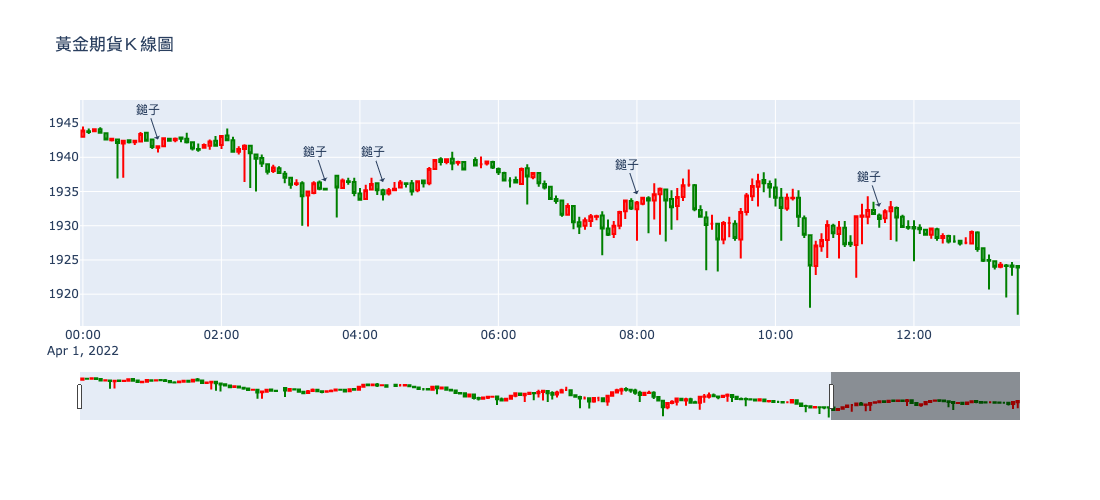

In [69]:
import plotly.graph_objects as go
fig = go.Figure(data = go.Candlestick(x = gold.index,
                                      open = gold['Open'],
                                      high = gold['High'],
                                      low = gold['Low'],
                                      close = gold['Close'],
                                      increasing_line_color = 'red',
                                      decreasing_line_color = 'green'))

idx = gold[gold['CDLHAMMER'] != 0].index
for i in range(len(idx)):
    day = idx[i]
    high = float(gold.loc[idx[i]][1])
    fig.add_annotation(x = day,
                       y = high + 1,
                       text = "鎚子",
                       arrowhead = 1)

fig.update_layout(width = 800, height = 500, title = "黃金期貨Ｋ線圖")
fig.show()